In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'indonesia_data.csv'

# Read the CSV file with a tab as the delimiter
df = pd.read_csv(file_path, sep=',', skiprows=3)

# Specify columns to drop
columns_to_drop = ["Country Name", "Country Code", "Indicator Code", "Unnamed: 67"]

# Drop the specified columns
df = df.drop(columns=columns_to_drop, errors='ignore')

df.head()

,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,"Intentional homicides, female (per 100,000 fem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Battle-related deaths (number of people),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25.000000,NaN,NaN,51.000000,46.000000
2,Voice and Accountability: Percentile Rank,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50.234741,51.724136,53.694580,51.724136,51.231525,51.941746,51.690823,52.173912,52.657005,52.657005
3,Transport services (% of commercial service ex...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.166508,16.540274,16.009078,15.773453,14.076974,11.782138,12.791524,16.996591,24.320345,20.562292
4,"Computer, communications and other services (%...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,41.753240,37.604955,32.747638,32.905134,29.722758,31.652221,30.470645,53.837504,63.763727,45.363189


In [3]:
# Specify a list of indicator names you want to select
indicator_names_to_select = ['Compensation of employees (% of expense)',
                             'Adjusted savings: education expenditure (current US$)',
                             'Population growth (annual %)', 
                             'Net migration',
                             'GDP growth (annual %)',
                             'Lending interest rate (%)',
                             'Inflation, consumer prices (annual %)',
                             'Life expectancy at birth, total (years)',
                             'Households and NPISHs final consumption expenditure (% of GDP)',
                             'Foreign direct investment, net inflows (% of GDP)',
                             'School enrollment, tertiary (% gross)',
                             'Unemployment, total (% of total labor force) (national estimate)'
                            ]

# Select rows with the specified indicator names
updated_df = df[df['Indicator Name'].isin(indicator_names_to_select)].set_index('Indicator Name')

# Transpose the df to have the predictors as column names
transposed_df = updated_df.transpose()

#Rearrange columns
transposed_df = transposed_df[['Compensation of employees (% of expense)', 
                               'Adjusted savings: education expenditure (current US$)',
                             'Population growth (annual %)', 
                             'Net migration',
                             'GDP growth (annual %)',
                             'Lending interest rate (%)',
                             'Inflation, consumer prices (annual %)',
                             'Life expectancy at birth, total (years)',
                             'Households and NPISHs final consumption expenditure (% of GDP)',
                             'Foreign direct investment, net inflows (% of GDP)',
                             'School enrollment, tertiary (% gross)',
                             'Unemployment, total (% of total labor force) (national estimate)']]

# Filter based on years
final_df = transposed_df.loc['1980':'2022']
final_df

Indicator Name,Compensation of employees (% of expense),Adjusted savings: education expenditure (current US$),Population growth (annual %),Net migration,GDP growth (annual %),Lending interest rate (%),"Inflation, consumer prices (annual %)","Life expectancy at birth, total (years)",Households and NPISHs final consumption expenditure (% of GDP),"Foreign direct investment, net inflows (% of GDP)","School enrollment, tertiary (% gross)","Unemployment, total (% of total labor force) (national estimate)"
1980,25.637693,8.199939e+08,2.379330,42246.0,10.000000,NaN,18.035430,58.754,60.518157,0.248336,3.389360,1.660
1981,23.990850,9.332714e+08,2.340666,44710.0,7.878788,NaN,12.265909,59.138,65.818942,0.155522,3.867450,NaN
1982,23.163492,9.413907e+08,2.308443,46789.0,2.247191,NaN,9.445424,59.757,69.878389,0.249561,3.880130,2.850
1983,21.805274,7.948842e+08,2.268718,47375.0,4.395604,NaN,11.799741,60.273,60.706590,0.360261,4.084380,NaN
1984,21.624829,7.881216e+08,2.205696,43693.0,6.842105,NaN,10.455035,60.728,61.874934,0.261627,5.338480,NaN
1985,21.587130,7.549251e+08,2.108876,37447.0,2.463054,NaN,4.724536,61.307,60.389482,0.363468,6.108770,2.100
1986,24.064954,6.682550e+08,1.996668,30990.0,5.769231,21.504167,5.822667,61.722,63.966282,0.322685,6.354230,2.590
1987,26.056196,5.921390e+08,1.924260,26709.0,5.000000,21.666667,9.278656,61.973,61.986958,0.507049,7.542740,2.550
1988,26.013154,6.153643e+08,1.880611,25379.0,5.627706,22.097500,8.045367,62.211,63.138121,0.683273,6.837380,2.740
1989,27.068912,7.191209e+08,1.835429,19910.0,7.786885,21.699167,6.415540,62.696,59.954051,0.722064,7.920650,NaN


In [4]:
#Number of NaN values in each column
final_df.isna().sum()

Indicator Name
Compensation of employees (% of expense)                            6
Adjusted savings: education expenditure (current US$)               1
Population growth (annual %)                                        0
Net migration                                                       0
GDP growth (annual %)                                               0
Lending interest rate (%)                                           6
Inflation, consumer prices (annual %)                               0
Life expectancy at birth, total (years)                             1
Households and NPISHs final consumption expenditure (% of GDP)      0
Foreign direct investment, net inflows (% of GDP)                   0
School enrollment, tertiary (% gross)                               0
Unemployment, total (% of total labor force) (national estimate)    5
dtype: int64

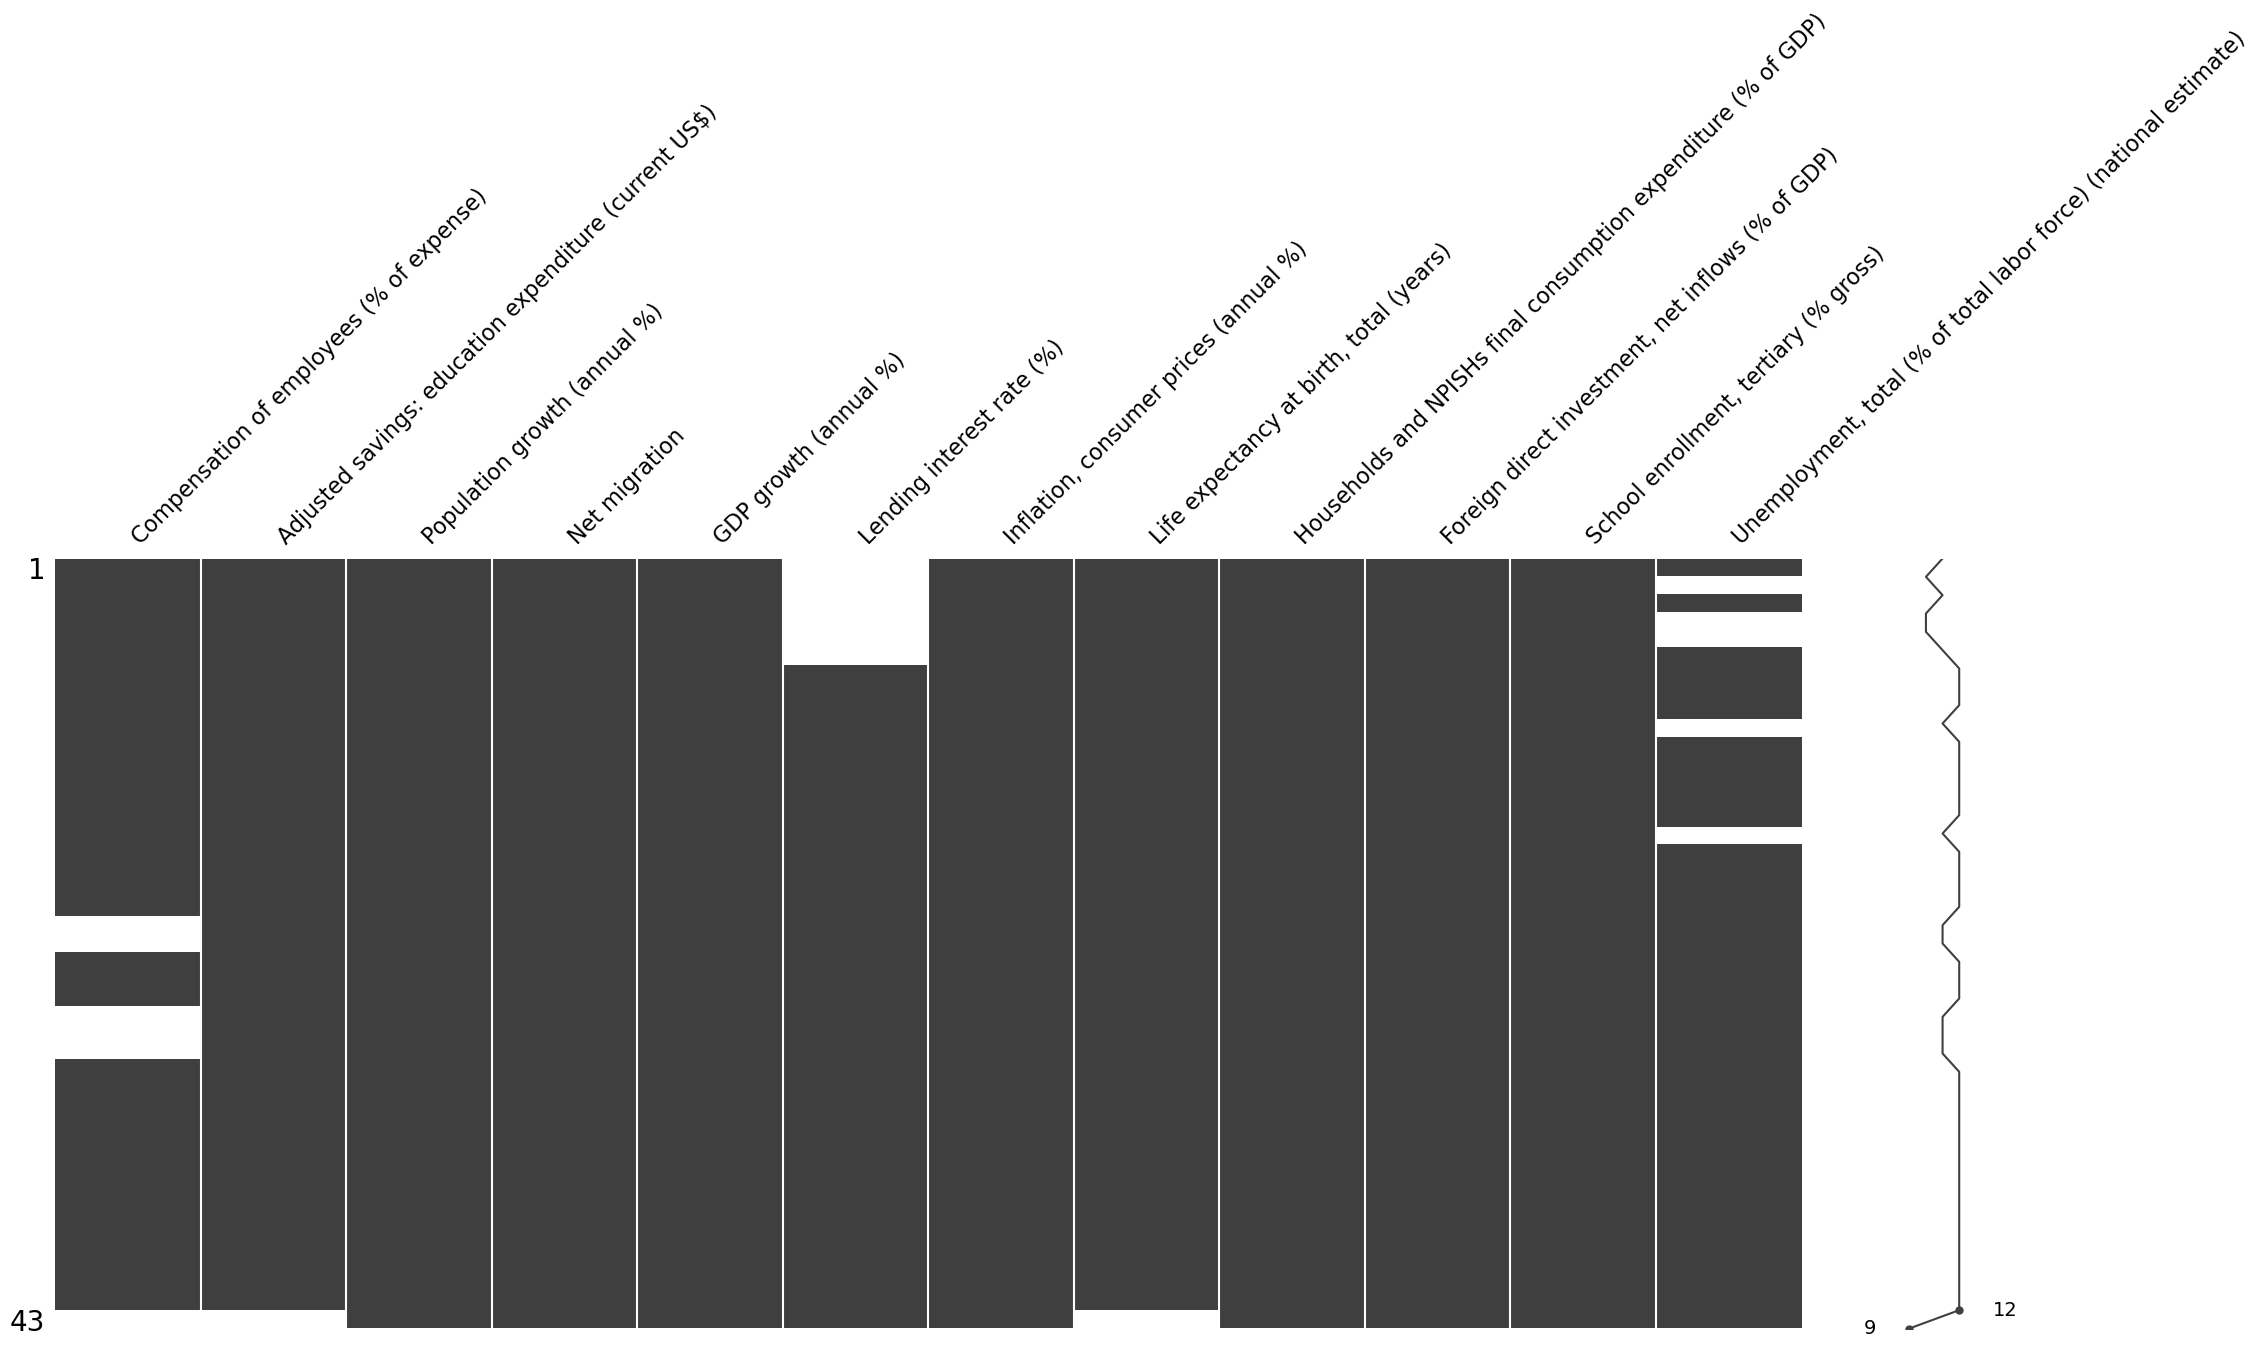

In [14]:
import missingno as msno

# Visualize missing values using a matrix
msno.matrix(final_df)
plt.show()

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43 entries, 1980 to 2022
Data columns (total 12 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Compensation of employees (% of expense)                          37 non-null     float64
 1   Adjusted savings: education expenditure (current US$)             42 non-null     float64
 2   Population growth (annual %)                                      43 non-null     float64
 3   Net migration                                                     43 non-null     float64
 4   GDP growth (annual %)                                             43 non-null     float64
 5   Lending interest rate (%)                                         37 non-null     float64
 6   Inflation, consumer prices (annual %)                             43 non-null     float64
 7   Life expectancy at birth, total (year

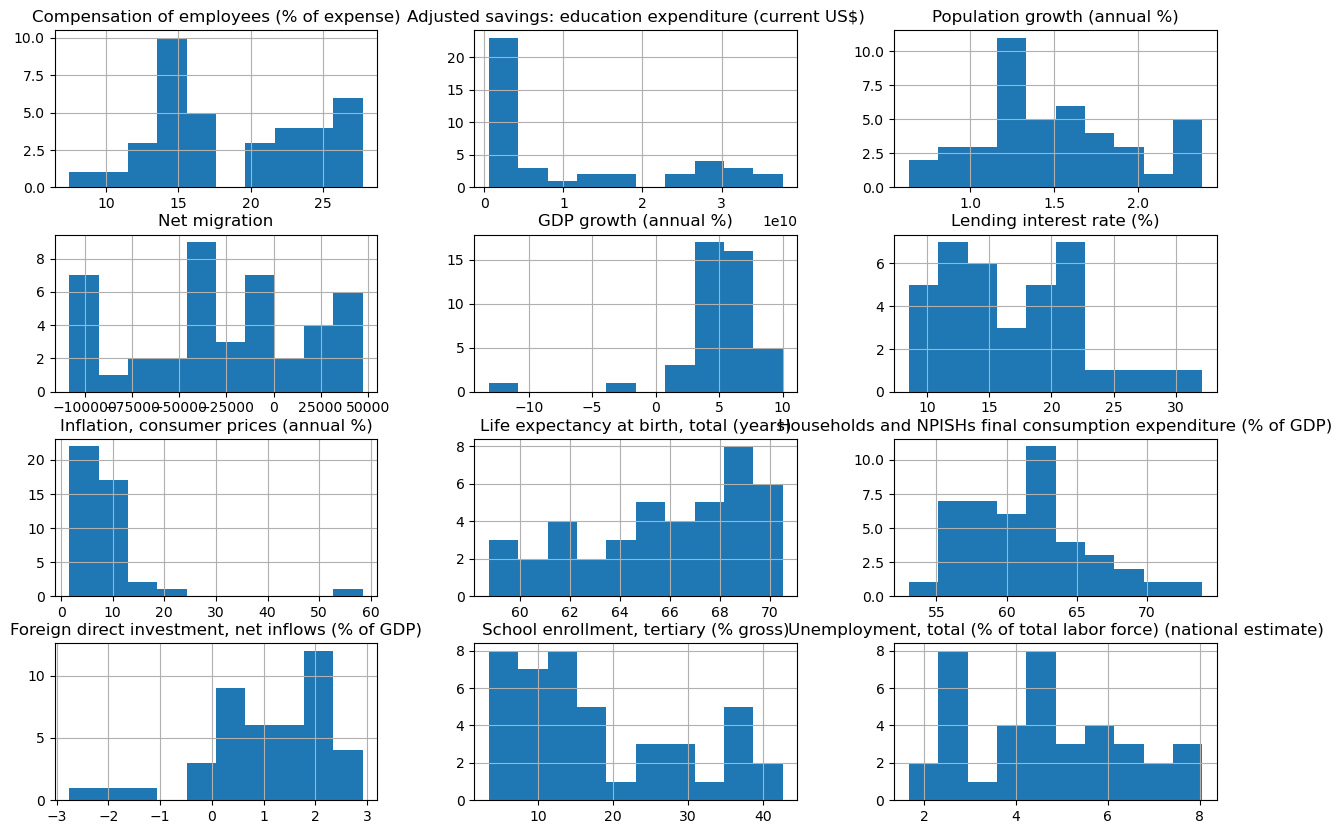

In [6]:
import matplotlib.pyplot as plt

final_df.hist(figsize=(15, 10))
plt.show()